DIABETES ANALYSIS PPT

https://drive.google.com/file/d/1qU6TaTPjmcpxZ2IWul-x-7A_oiAIk3rM/view?usp=drive_link

# Library

In [ ]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Data

In [ ]:
path='/content/Diabetes dataset.xlsx'
data=pd.read_excel(path)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
data.shape

(768, 9)

# Outliers

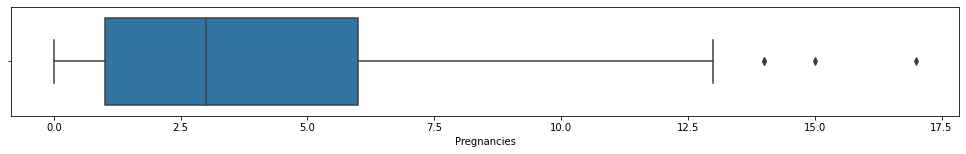

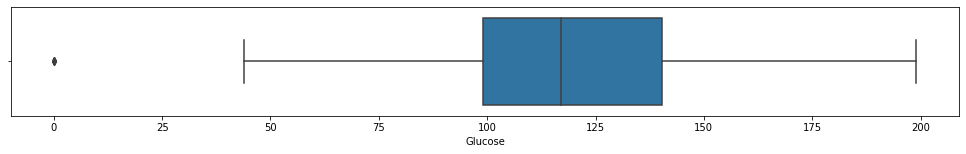

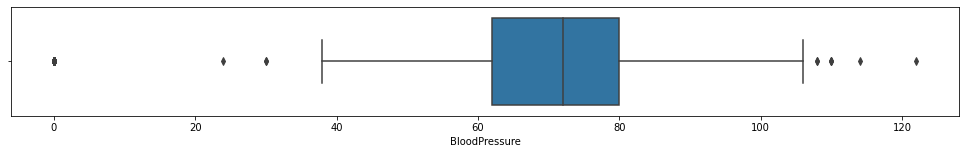

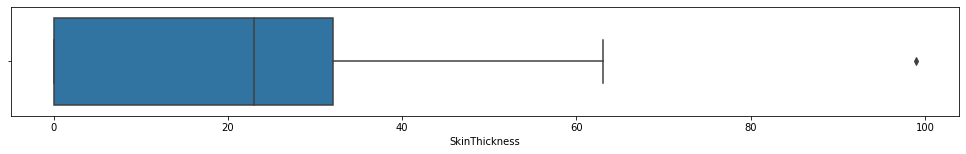

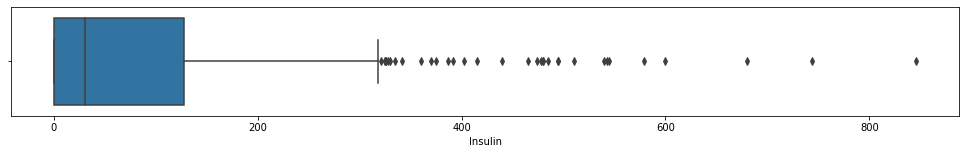

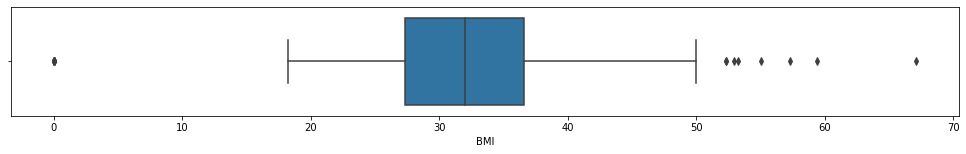

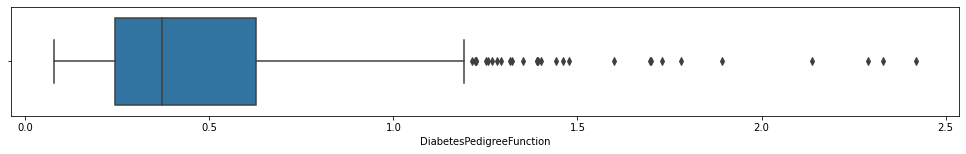

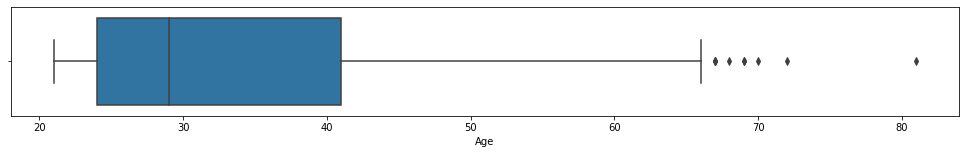

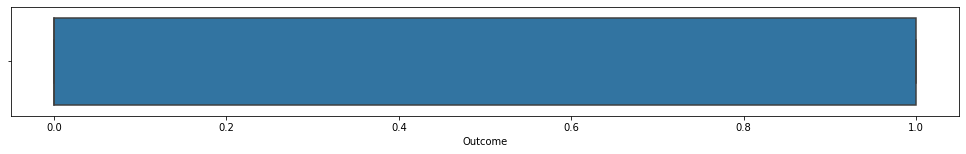

In [ ]:
for column in data:
    plt.figure(figsize=(17,2))
    sns.boxplot(data=data, x=column)

In [ ]:
q3 = data['Pregnancies'].quantile(.75)
q1 = data['Pregnancies'].quantile(.25)
iqr = q3-q1
iqr

5.0

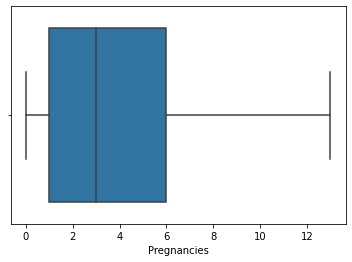

In [ ]:
upperrange = q3+1.5*iqr
bottomrange = q1-1.5*iqr
df = data[(data['Pregnancies']>bottomrange) & (data['Pregnancies']<upperrange)]
sns.boxplot(data=df,x='Pregnancies')

In [ ]:
q3 = data['Glucose'].quantile(.75)
q1 = data['Glucose'].quantile(.25)
iqr = q3-q1
iqr

41.25

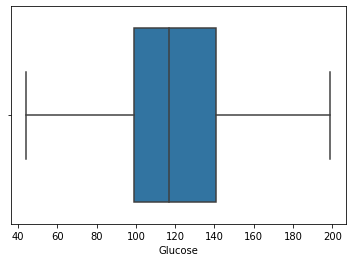

In [ ]:
upperrange = q3+1.5*iqr
bottomrange = q1-1.5*iqr
df = data[(data['Glucose']>bottomrange) & (data['Glucose']<upperrange)]
sns.boxplot(data=df,x='Glucose')

In [ ]:
q3 = data['BloodPressure'].quantile(.75)
q1 = data['BloodPressure'].quantile(.25)
iqr = q3-q1
iqr

18.0

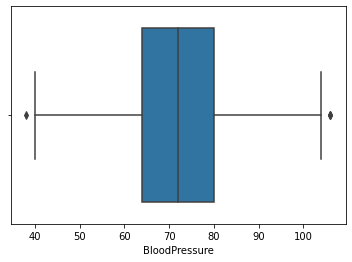

In [ ]:
upperrange = q3+1.5*iqr
bottomrange = q1-1.5*iqr
df = data[(data['BloodPressure']>bottomrange) & (data['BloodPressure']<upperrange)]
sns.boxplot(data=df,x='BloodPressure')

In [ ]:
q3 = data['SkinThickness'].quantile(.75)
q1 = data['SkinThickness'].quantile(.25)
iqr = q3-q1
iqr

32.0

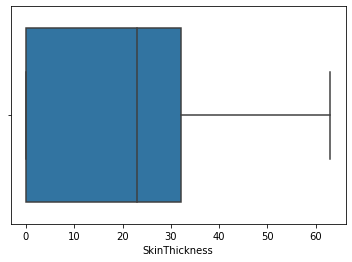

In [ ]:
upperrange = q3+1.5*iqr
bottomrange = q1-1.5*iqr
df = data[(data['SkinThickness']>bottomrange) & (data['SkinThickness']<upperrange)]
sns.boxplot(data=df,x='SkinThickness')

In [ ]:
q3 = data['BMI'].quantile(.75)
q1 = data['BMI'].quantile(.25)
iqr = q3-q1
iqr

9.3

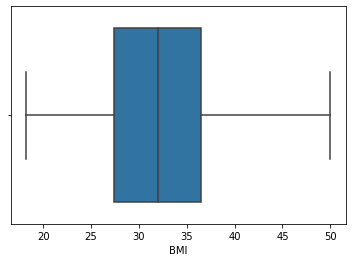

In [ ]:
upperrange = q3+1.5*iqr
bottomrange = q1-1.5*iqr
df = data[(data['BMI']>bottomrange) & (data['BMI']<upperrange)]
sns.boxplot(data=df,x='BMI')

In [ ]:
q3 = data['DiabetesPedigreeFunction'].quantile(.75)
q1 = data['DiabetesPedigreeFunction'].quantile(.25)
iqr = q3-q1
iqr

0.38249999999999995

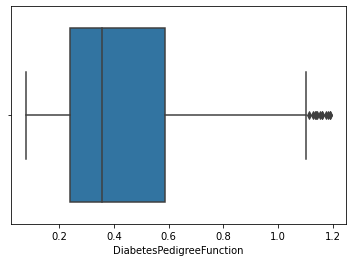

In [ ]:
upperrange = q3+1.5*iqr
bottomrange = q1-1.5*iqr
df = data[(data['DiabetesPedigreeFunction']>bottomrange) & (data['DiabetesPedigreeFunction']<upperrange)]
sns.boxplot(data=df,x='DiabetesPedigreeFunction')

In [ ]:
q3 = data['Age'].quantile(.75)
q1 = data['Age'].quantile(.25)
iqr = q3-q1
iqr

17.0

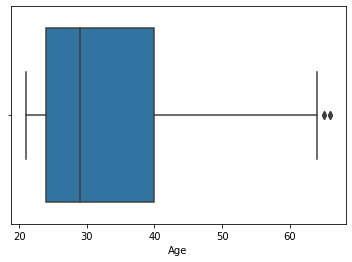

In [ ]:
upperrange = q3+1.5*iqr
bottomrange = q1-1.5*iqr
df = data[(data['Age']>bottomrange) & (data['Age']<upperrange)]
sns.boxplot(data=df,x='Age')

In [ ]:
q3 = data['Insulin'].quantile(.75)
q1 = data['Insulin'].quantile(.25)
iqr = q3-q1
iqr

127.25

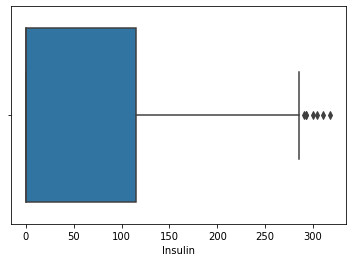

In [ ]:
upperrange = q3+1.5*iqr
bottomrange = q1-1.5*iqr
df = data[(data['Insulin']>bottomrange) & (data['Insulin']<upperrange)]
sns.boxplot(data=df,x='Insulin')

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# EDA

With univariate analysis, skin thickness was increased and significantly related to duration of diabetes (P less than .001), previous glycemic control (P less than .001), retinopathy (P less than .001), cheiroarthropathy (P less than .001), and vibration-perception threshold (P less than .05).

we observe that as the skinthickness level increases the more chance of
 getting diabetes

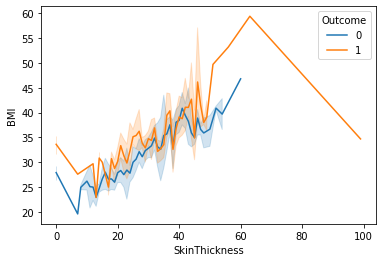

In [ ]:
sns.lineplot(x="SkinThickness",y="BMI",data=data,hue='Outcome')

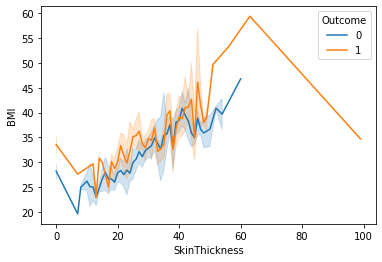

In [ ]:
sns.lineplot(x="SkinThickness",y="BMI",data=df,hue='Outcome')

As we observe that the more chance of cause diabetes during the age of 0-38

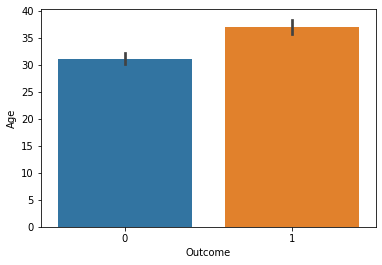

In [ ]:
sns.barplot(x="Outcome",y="Age",data=data)

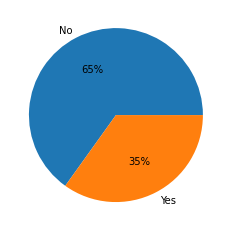

In [ ]:
labels = ['No', 'Yes']
y_data = data.groupby('Outcome')['Outcome'].count()
plt.pie(y_data,labels=labels, autopct='%.0f%%')
plt.show()

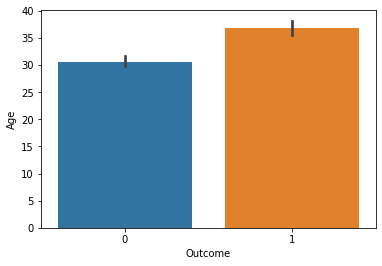

In [ ]:
sns.barplot(x="Outcome",y="Age",data=df)

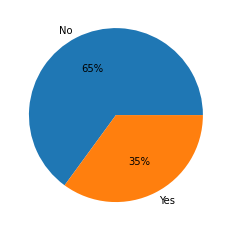

In [ ]:
labels = ['No', 'Yes']
y_df = df.groupby('Outcome')['Outcome'].count()
plt.pie(y_df,labels=labels, autopct='%.0f%%')
plt.show()

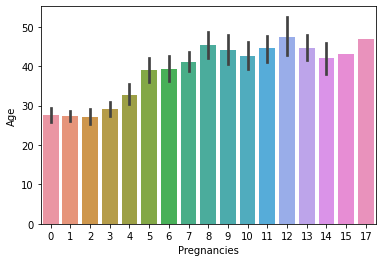

In [ ]:
sns.barplot(x="Pregnancies",y="Age",data=data)

the glucose level from 100-150 is more in Bmi level of 20-30

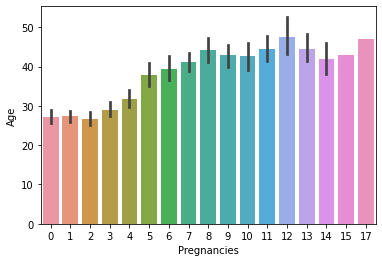

In [ ]:
sns.barplot(x="Pregnancies",y="Age",data=df)

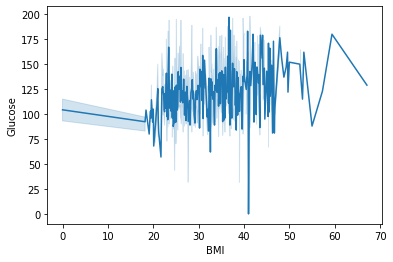

In [ ]:
sns.lineplot(x="BMI",y="Glucose",data=data)

the Blood pressure from 60-100 is  at the level of BMI 20-50

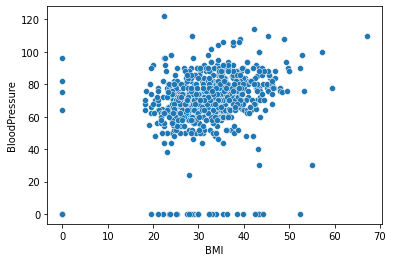

In [ ]:
sns.scatterplot(x="BMI",y="BloodPressure",data=data)

As the Blood Pressure increasing form 0 level the insulin level is increasing.

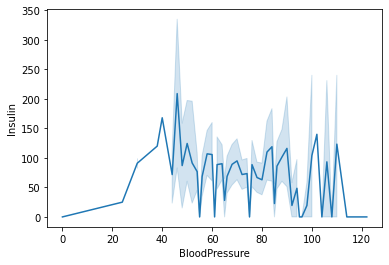

In [ ]:
sns.lineplot(x="BloodPressure",y="Insulin",data=data)

insights:The diabetes percentage started during the age of 20 & 30 and goes to peak stage during the age of 50-60.

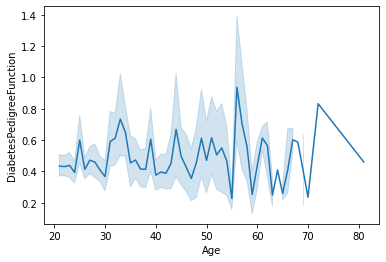

In [ ]:
sns.lineplot(x="Age",y="DiabetesPedigreeFunction",data=data)

# Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_df = scaler.fit_transform(df)
print(normalized_df)

[[0.35294118 0.74371859 0.59016393 ... 0.23441503 0.48333333 1.        ]
 [0.05882353 0.42713568 0.54098361 ... 0.11656704 0.16666667 0.        ]
 [0.47058824 0.91959799 0.52459016 ... 0.25362938 0.18333333 1.        ]
 ...
 [0.29411765 0.6080402  0.59016393 ... 0.07130658 0.15       0.        ]
 [0.05882353 0.63316583 0.49180328 ... 0.11571307 0.43333333 1.        ]
 [0.05882353 0.46733668 0.57377049 ... 0.10119556 0.03333333 0.        ]]


In [ ]:
normalized_df = pd.DataFrame(normalized_df, columns=df.columns)
print(normalized_df)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1       0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2       0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3       0.058824  0.447236       0.540984       0.232323  0.295597  0.418778   
4       0.000000  0.688442       0.327869       0.353535  0.528302  0.642325   
..           ...       ...            ...            ...       ...       ...   
729     0.588235  0.507538       0.622951       0.484848  0.566038  0.490313   
730     0.117647  0.613065       0.573770       0.272727  0.000000  0.548435   
731     0.294118  0.608040       0.590164       0.232323  0.352201  0.390462   
732     0.058824  0.633166       0.491803       0.000000  0.000000  0.448584   
733     0.058824  0.467337       0.573770       0.313131  0.000000  0.453055   

     DiabetesPedigreeFunction       Age

# Analysis

## Logistic Regression

In [ ]:
x = normalized_df.drop(['Outcome'], axis=1)
y=normalized_df['Outcome']
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.295597,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.528302,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...,...
729,0.588235,0.507538,0.622951,0.484848,0.566038,0.490313,0.039710,0.700000
730,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000
731,0.294118,0.608040,0.590164,0.232323,0.352201,0.390462,0.071307,0.150000
732,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333


In [ ]:
y

0      1.0
1      0.0
2      1.0
3      0.0
4      1.0
      ... 
729    0.0
730    0.0
731    0.0
732    1.0
733    0.0
Name: Outcome, Length: 734, dtype: float64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= .3,
                                                    random_state= 46)

In [ ]:
logreg= LogisticRegression(C=1e9)
logreg.fit(x_train,y_train)

LogisticRegression(C=1000000000.0)

In [ ]:
y_pred = logreg.predict(x_test)
y_pred

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
logistic = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
logistic

,Predicted,Actual
370,0.0,1.0
655,0.0,0.0
36,0.0,1.0
708,0.0,0.0
266,0.0,0.0
...,...,...
230,0.0,0.0
701,0.0,0.0
325,0.0,0.0
526,0.0,0.0


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.011185682326621982

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.2171945701357466

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7828054298642534

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[135,  14],
       [ 34,  38]])

## Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bag_model = BaggingClassifier(
base_estimator=BaggingClassifier(),
n_estimators=1000,
max_samples=0.8,
bootstrap=True,
oob_score=True,
random_state=42
)

In [ ]:
x = normalized_df.drop(['Outcome'], axis=1)
y=normalized_df['Outcome']
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.295597,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.528302,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...,...
729,0.588235,0.507538,0.622951,0.484848,0.566038,0.490313,0.039710,0.700000
730,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000
731,0.294118,0.608040,0.590164,0.232323,0.352201,0.390462,0.071307,0.150000
732,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2,random_state=42)
y_test

370    1.0
655    0.0
36     1.0
708    0.0
266    0.0
      ... 
542    0.0
122    0.0
685    0.0
295    0.0
132    0.0
Name: Outcome, Length: 147, dtype: float64

In [ ]:
l=bag_model.fit(x_train, y_train)


In [ ]:
l.score(x_test,y_test)

0.7551020408163265

## Boosting

In [ ]:
#gradientBoosting
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error as MSE

In [ ]:
x = normalized_df.drop(['Outcome'], axis=1)
y=normalized_df['Outcome']
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.295597,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.528302,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...,...
729,0.588235,0.507538,0.622951,0.484848,0.566038,0.490313,0.039710,0.700000
730,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000
731,0.294118,0.608040,0.590164,0.232323,0.352201,0.390462,0.071307,0.150000
732,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=42)
y_test


559    0.0
33     0.0
275    0.0
198    0.0
192    1.0
      ... 
568    0.0
412    0.0
176    0.0
548    0.0
264    0.0
Name: Outcome, Length: 221, dtype: float64

####AdaBoosting

In [ ]:
#Ada Boosting
from sklearn.ensemble import AdaBoostClassifier

adaclf = AdaBoostClassifier(
    n_estimators=1000,
    learning_rate=0.01,
    random_state=42)
adaclf.fit(x_train, y_train)
y_pred_1 = adaclf.predict(x_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_1))

Accuracy: 0.755656108597285


####GradientBoosting

In [ ]:
#GradientBoosting
GradientBoostingClassifier,
Classifier = GradientBoostingClassifier(
    max_depth=2,
    n_estimators=1000,
    learning_rate=0.01,
    random_state=42
)
Classifier.fit(x_train, y_train)


GradientBoostingClassifier(learning_rate=0.01, max_depth=2, n_estimators=1000,
                           random_state=42)

In [ ]:
Classifier.score(x_test,y_test)

0.7692307692307693

####ExtremeGradientBoosting

In [ ]:
#ExtremeGradientBoosting
from xgboost import XGBClassifier

adaclf =XGBClassifier(
    n_estimators=1000,
    learning_rate=0.01,
    random_state=42)
adaclf.fit(x_train, y_train)
y_pred_1 = adaclf.predict(x_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_1))

Accuracy: 0.7647058823529411


## Decision Tree

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
x = normalized_df.drop(['Outcome'], axis=1)
y=normalized_df['Outcome']
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.295597,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.528302,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...,...
729,0.588235,0.507538,0.622951,0.484848,0.566038,0.490313,0.039710,0.700000
730,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000
731,0.294118,0.608040,0.590164,0.232323,0.352201,0.390462,0.071307,0.150000
732,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
clf=DecisionTreeClassifier()

In [ ]:
clf=clf.fit(x_train,y_train)

In [ ]:
y_pred=clf.predict(x_test)
y_pred

array([0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.])

In [ ]:
print(metrics.accuracy_score(y_test,y_pred)*100,"%")

72.85067873303167 %


## KNN

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [ ]:
x = normalized_df.drop(['Outcome'], axis=1)
y=normalized_df['Outcome']
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.295597,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.528302,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...,...
729,0.588235,0.507538,0.622951,0.484848,0.566038,0.490313,0.039710,0.700000
730,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000
731,0.294118,0.608040,0.590164,0.232323,0.352201,0.390462,0.071307,0.150000
732,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
model=KNeighborsClassifier(n_neighbors=20)
model.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=20)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
df=pd.DataFrame({'Actual':y_test,'Predict':y_pred})
df

,Actual,Predict
559,0.0,0.0
33,0.0,0.0
275,0.0,0.0
198,0.0,0.0
192,1.0,0.0
...,...,...
568,0.0,0.0
412,0.0,0.0
176,0.0,0.0
548,0.0,0.0


In [ ]:
print(metrics.accuracy_score(y_test,y_pred)*100,"%")

74.6606334841629 %


### KNN with K parameters

In [ ]:
k_list = list(range(1,41))

In [ ]:
k_values = dict(n_neighbors=k_list)
print(k_values.keys()),
print(k_values.values())

dict_keys(['n_neighbors'])
dict_values([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]])


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid = GridSearchCV(model, k_values, cv=5, scoring='accuracy')

In [ ]:
grid.fit(data.drop('Outcome', axis=1), data.Outcome)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=20),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

In [ ]:
grid.cv_results_
grid_table = pd.DataFrame(grid.cv_results_)
grid_table.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006344,0.002636,0.014082,0.004693,1,{'n_neighbors': 1},0.642857,0.629870,0.668831,0.758170,0.614379,0.662821,0.050909,40
1,0.006830,0.003015,0.017226,0.007774,2,{'n_neighbors': 2},0.668831,0.668831,0.714286,0.725490,0.692810,0.694050,0.023115,39
2,0.005088,0.000219,0.011011,0.000334,3,{'n_neighbors': 3},0.681818,0.694805,0.753247,0.751634,0.686275,0.713556,0.032026,38
3,0.013159,0.010574,0.024783,0.015764,4,{'n_neighbors': 4},0.707792,0.733766,0.720779,0.738562,0.705882,0.721356,0.013220,37
4,0.007738,0.002880,0.025691,0.007663,5,{'n_neighbors': 5},0.727273,0.727273,0.701299,0.758170,0.705882,0.723979,0.020162,36


In [ ]:
for key in grid.cv_results_.keys():
  print(key)

mean_fit_time
std_fit_time
mean_score_time
std_score_time
param_n_neighbors
params
split0_test_score
split1_test_score
split2_test_score
split3_test_score
split4_test_score
mean_test_score
std_test_score
rank_test_score


In [ ]:
grid_table_rank = grid_table[['params','mean_test_score','std_test_score','rank_test_score']].loc[grid_table['rank_test_score']==1].sort_values(by='std_test_score', ascending=True)
grid_table_rank

,params,mean_test_score,std_test_score,rank_test_score
13,{'n_neighbors': 14},0.757856,0.03007,1


In [ ]:
print("The best value of k = {} with {} of accuracy.".format(grid.best_params_,grid.best_score_))

The best value of k = {'n_neighbors': 14} with 0.7578558696205755 of accuracy.


In [ ]:
print("The best k value, rank {}, with k = {}, highest mean accuracy along with the cross validation = {} and lowest standard deviation = {}".format(grid_table.at[grid.best_index_,'rank_test_score'],grid_table.at[grid.best_index_,'params'],grid_table.at[grid.best_index_,'mean_test_score'],grid_table.at[grid.best_index_,'std_test_score']))

The best k value, rank 1, with k = {'n_neighbors': 14}, highest mean accuracy along with the cross validation = 0.7578558696205755 and lowest standard deviation = 0.030069794988236098


In [ ]:
print("The best classifier is: {}".format(grid.best_estimator_))

The best classifier is: KNeighborsClassifier(n_neighbors=14)


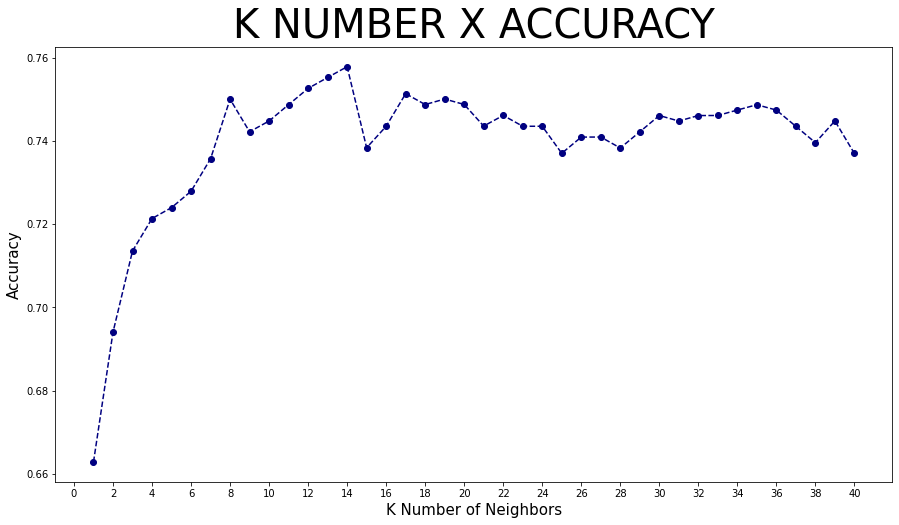

In [ ]:
graphic = grid.cv_results_['mean_test_score']
graphic

plt.figure(figsize=(15,8))
plt.plot(k_list,graphic,color='navy',linestyle='dashed',marker='o')
plt.xlabel('K Number of Neighbors', fontdict={'fontsize': 15})
plt.ylabel('Accuracy', fontdict={'fontsize': 15})
plt.title('K NUMBER X ACCURACY', fontdict={'fontsize': 40})
plt.xticks(range(0,41,2),)
#plt.xaxis.set_major_locator(MultipleLocator(3))
plt.show()

## SVM

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics

In [ ]:
x = normalized_df.drop(['Outcome'], axis=1)
y=normalized_df['Outcome']
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.295597,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.528302,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...,...
729,0.588235,0.507538,0.622951,0.484848,0.566038,0.490313,0.039710,0.700000
730,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000
731,0.294118,0.608040,0.590164,0.232323,0.352201,0.390462,0.071307,0.150000
732,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
cls=svm.SVC(kernel='linear')

In [ ]:
cls.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
y_pred=cls.predict(x_test)

In [ ]:
print(metrics.accuracy_score(y_test,y_pred)*100,"%")

76.92307692307693 %


## Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
x = normalized_df.drop(['Outcome'], axis=1)
y=normalized_df['Outcome']
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.295597,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.528302,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...,...
729,0.588235,0.507538,0.622951,0.484848,0.566038,0.490313,0.039710,0.700000
730,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000
731,0.294118,0.608040,0.590164,0.232323,0.352201,0.390462,0.071307,0.150000
732,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
regressor = RandomForestClassifier(n_estimators = 20, random_state = 42)

In [ ]:
regressor.fit(x_train,y_train)

RandomForestClassifier(n_estimators=20, random_state=42)

In [ ]:
RandomForestClassifier(n_estimators=10, random_state=100)

RandomForestClassifier(n_estimators=10, random_state=100)

In [ ]:
predicted = regressor.predict(x_test)

In [ ]:
accuracy_score(y_test,predicted)*100

72.10884353741497

## Neural Network

In [ ]:
import tensorflow as tf

In [ ]:
x = normalized_df.drop(['Outcome'], axis=1)
y=normalized_df['Outcome']
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.295597,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.528302,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...,...
729,0.588235,0.507538,0.622951,0.484848,0.566038,0.490313,0.039710,0.700000
730,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000
731,0.294118,0.608040,0.590164,0.232323,0.352201,0.390462,0.071307,0.150000
732,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333


In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=56)
y_test

78     0.0
504    0.0
511    1.0
121    1.0
81     1.0
      ... 
348    0.0
676    1.0
300    0.0
372    0.0
331    0.0
Name: Outcome, Length: 221, dtype: float64

In [ ]:
tf.random.set_seed(56)

# STEP1: Creating the model

model= tf.keras.Sequential([     tf.keras.layers.Dense(8, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(4, activation='relu'),
                            tf.keras.layers.Dense(3, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.0005),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy')
                        ])

# STEP3: Fit the model

h= model.fit(x_train, y_train, epochs=300 ,verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.4782 - accuracy: 0.7602


[0.4781758487224579, 0.7601810097694397]

Text(0, 0.5, 'Loss & Accuracy')

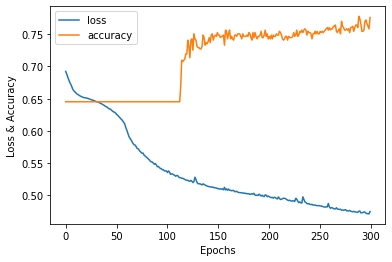

In [ ]:
pd.DataFrame(h.history).plot()
plt.xlabel("Epochs")
plt.ylabel("Loss & Accuracy")

In [ ]:
|model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 8)                 72        
                                                                 
 dense_37 (Dense)            (None, 4)                 36        
                                                                 
 dense_38 (Dense)            (None, 2)                 10        
                                                                 
 dense_39 (Dense)            (None, 1)                 3         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Vectorize the text data
vectorizer = CountVectorizer()
y_train = vectorizer.fit_transform(y_train)
y_test = vectorizer.transform(y_test)

# Convert the sparse matrix to a dense matrix
y_train = y_train.toarray()
y_test = y_test.toarray()